# Data visualization

To see plotly visualization integrated to the notebook , see https://plotly.com/~anproulx/2/data-visualization/

In [110]:
#import librairies
import os
import pandas as pd
import nilearn as nl
import seaborn as sns
from nilearn import plotting as nlp
from nilearn.input_data import NiftiLabelsMasker
from nilearn import datasets
from nilearn import image
from nilearn import input_data
from nilearn.image import load_img
from nilearn.connectome import ConnectivityMeasure
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

import plotly
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as py
from chart_studio import tools
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import chart_studio

# Data exploration with static plotting

In [89]:
data=nl.datasets.fetch_abide_pcp()

/home/anproulx/miniconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning:

Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.



In [90]:
abide = datasets.fetch_abide_pcp(quality_checked = True)

In [91]:
abide.keys()

#len(data.func_preproc) 

dict_keys(['description', 'phenotypic', 'func_preproc'])

In [92]:
pheno=pd.DataFrame(data.phenotypic)
phen=pheno.drop("Unnamed_0", axis=1)

phen.head()

i  SUB_ID  X  subject  SITE_ID          FILE_ID  DX_GROUP  DSM_IV_TR  \
0  1   50003  2    50003  b'PITT'  b'Pitt_0050003'         1          1   
1  2   50004  3    50004  b'PITT'  b'Pitt_0050004'         1          1   
2  3   50005  4    50005  b'PITT'  b'Pitt_0050005'         1          1   
3  4   50006  5    50006  b'PITT'  b'Pitt_0050006'         1          1   
4  5   50007  6    50007  b'PITT'  b'Pitt_0050007'         1          1   

   AGE_AT_SCAN  SEX HANDEDNESS_CATEGORY  HANDEDNESS_SCORES    FIQ  VIQ  PIQ  \
0        24.45    1                b'R'                NaN  124.0  128  115   
1        19.09    1                b'R'                NaN  113.0  108  117   
2        13.73    2                b'R'                NaN  119.0  117  118   
3        13.37    1                b'L'                NaN  109.0   99  119   
4        17.78    1                b'R'                NaN  110.0  106  112   

  FIQ_TEST_TYPE VIQ_TEST_TYPE PIQ_TEST_TYPE  ADI_R_SOCIAL_TOTAL_A  \
0       b'WASI'       b'WASI'       b'WASI'                    27   
1       b'WASI'       b'WASI'       b'WASI'                    19   
2       b'WASI'       b'WASI'       b'WASI'                    23   
3       b'WASI'       b'WASI'       b'WASI'                    13   
4       b'WASI'       b'WASI'       b'WASI'                    21   

   ADI_R_VERBAL_TOTAL_BV  ADI_RRB_TOTAL_C  ADI_R_ONSET_TOTAL_D  \
0                     22                5                    3   
1                     12                5                    3   
2                     19                3                    4   
3                     10                4                    3   
4                     14                9                    1   

   ADI_R_RSRCH_RELIABLE  ADOS_MODULE  ADOS_TOTAL  ADOS_COMM  ADOS_SOCIAL  \
0                     1            4          13          5            8   
1                     1            4          18          6           12   
2                     1            4          12          4            8   
3                     1            4          12          4            8   
4                     1            3          17          5           12   

   ADOS_STEREO_BEHAV  ADOS_RSRCH_RELIABLE  ADOS_GOTHAM_SOCAFFECT  \
0                  1                    1                     -1   
1                  2                    1                     -1   
2                  1                    1                     -1   
3                  4                    1                     -1   
4                  2                    1                     -1   

   ADOS_GOTHAM_RRB  ADOS_GOTHAM_TOTAL  ADOS_GOTHAM_SEVERITY  SRS_VERSION  \
0               -1                 -1                    -1           -1   
1               -1                 -1                    -1           -1   
2               -1                 -1                    -1           -1   
3               -1                 -1                    -1           -1   
4               -1                 -1                    -1           -1   

   SRS_RAW_TOTAL  SRS_AWARENESS  SRS_COGNITION  SRS_COMMUNICATION  \
0             -1             -1             -1                 -1   
1             -1             -1             -1                 -1   
2             -1             -1             -1                 -1   
3             -1             -1             -1                 -1   
4             -1             -1             -1                 -1   

   SRS_MOTIVATION  SRS_MANNERISMS  SCQ_TOTAL  AQ_TOTAL COMORBIDITY  \
0              -1              -1         -1        -1         b''   
1              -1              -1         -1        -1         b''   
2              -1              -1         -1        -1         b''   
3              -1              -1         -1        -1         b''   
4              -1              -1         -1        -1         b''   

  CURRENT_MED_STATUS MEDICATION_NAME  OFF_STIMULANTS_AT_SCAN  \
0               b'1'   b'Fluoxetine'      

In [93]:
#replace encoded values with labels

pheno_lab= phen["DX_GROUP"].replace([1 , 2], ["autism", "control"]) #1 is autism, 2 is control
phen["DX_GROUP"]=pheno_lab

pheno_lab= phen["SEX"].replace([1 , 2], ["male", "female"]) #1 is male, 2 is female
phen["SEX"]=pheno_lab

pheno_lab= phen["DSM_IV_TR"].replace([0 , 1 , 2 , 3 , 4 , -9999], ["control", "autism" , "asperger" , "PPD-NOS", "Asperger or PPD-NOS", "NaN"]) #O is control, 1 is autism, 2 is Asperger, 3 is PPD-NOS, 4 is Asperger or PPD-NOS
phen["DSM_IV_TR"]=pheno_lab

pd.set_option('display.max_columns', 500)
phen.head()

i  SUB_ID  X  subject  SITE_ID          FILE_ID DX_GROUP DSM_IV_TR  \
0  1   50003  2    50003  b'PITT'  b'Pitt_0050003'   autism    autism   
1  2   50004  3    50004  b'PITT'  b'Pitt_0050004'   autism    autism   
2  3   50005  4    50005  b'PITT'  b'Pitt_0050005'   autism    autism   
3  4   50006  5    50006  b'PITT'  b'Pitt_0050006'   autism    autism   
4  5   50007  6    50007  b'PITT'  b'Pitt_0050007'   autism    autism   

   AGE_AT_SCAN     SEX HANDEDNESS_CATEGORY  HANDEDNESS_SCORES    FIQ  VIQ  \
0        24.45    male                b'R'                NaN  124.0  128   
1        19.09    male                b'R'                NaN  113.0  108   
2        13.73  female                b'R'                NaN  119.0  117   
3        13.37    male                b'L'                NaN  109.0   99   
4        17.78    male                b'R'                NaN  110.0  106   

   PIQ FIQ_TEST_TYPE VIQ_TEST_TYPE PIQ_TEST_TYPE  ADI_R_SOCIAL_TOTAL_A  \
0  115       b'WASI'       b'WASI'       b'WASI'                    27   
1  117       b'WASI'       b'WASI'       b'WASI'                    19   
2  118       b'WASI'       b'WASI'       b'WASI'                    23   
3  119       b'WASI'       b'WASI'       b'WASI'                    13   
4  112       b'WASI'       b'WASI'       b'WASI'                    21   

   ADI_R_VERBAL_TOTAL_BV  ADI_RRB_TOTAL_C  ADI_R_ONSET_TOTAL_D  \
0                     22                5                    3   
1                     12                5                    3   
2                     19                3                    4   
3                     10                4                    3   
4                     14                9                    1   

   ADI_R_RSRCH_RELIABLE  ADOS_MODULE  ADOS_TOTAL  ADOS_COMM  ADOS_SOCIAL  \
0                     1            4          13          5            8   
1                     1            4          18          6           12   
2                     1            4          12          4            8   
3                     1            4          12          4            8   
4                     1            3          17          5           12   

   ADOS_STEREO_BEHAV  ADOS_RSRCH_RELIABLE  ADOS_GOTHAM_SOCAFFECT  \
0                  1                    1                     -1   
1                  2                    1                     -1   
2                  1                    1                     -1   
3                  4                    1                     -1   
4                  2                    1                     -1   

   ADOS_GOTHAM_RRB  ADOS_GOTHAM_TOTAL  ADOS_GOTHAM_SEVERITY  SRS_VERSION  \
0               -1                 -1                    -1           -1   
1               -1                 -1                    -1           -1   
2               -1                 -1                    -1           -1   
3               -1                 -1                    -1           -1   
4               -1                 -1                    -1           -1   

   SRS_RAW_TOTAL  SRS_AWARENESS  SRS_COGNITION  SRS_COMMUNICATION  \
0             -1             -1             -1                 -1   
1             -1             -1             -1                 -1   
2             -1             -1             -1                 -1   
3             -1             -1             -1                 -1   
4             -1             -1             -1                 -1   

   SRS_MOTIVATION  SRS_MANNERISMS  SCQ_TOTAL  AQ_TOTAL COMORBIDITY  \
0              -1              -1         -1        -1         b''   
1              -1              -1         -1        -1         b''   
2              -1              -1         -1        -1         b''   
3              -1              -1         -1        -1         b''   
4              -1              -1         -1        -1         b''   

  CURRENT_MED_STATUS MEDICATION_NAME  OFF_STIMULANTS_AT_SCAN  \
0               b'1'   b'Fluoxetine'

In [94]:
#replace site abbreviations with full names

phen=phen.replace ([b'PITT', b'OLIN', b'OHSU', b'SDSU', b'TRINITY', b'UM_1', b'UM_2',
       b'USM', b'YALE', b'CMU', b'LEUVEN_1', b'LEUVEN_2', b'KKI', b'NYU',
       b'STANFORD', b'UCLA_1', b'UCLA_2', b'MAX_MUN', b'CALTECH', b'SBL'], ['University of Pittsburgh', 'OLIN Institute of Living', 'Oregon Health and Science University', 'San Diego State University', 'TRINITY Centre for Health Sciences', 'University of Michigan', 'University of Michigan',
      'Utah School of Medicine', 'Yale Child Study Center', 'Carnegie Mellon University', 'University of Leuven', 'University of Leuven', 'Kennedy Krieger Institute', 'NYU Langone Medical Center',       'Stanford University', 'University of California, Los Angeles', 'University of California, Los Angeles', 'LMU Munich', 'CALTECH', 'Social Brain Lab Groningen'])
phen

i  SUB_ID     X  subject                     SITE_ID  \
0       1   50003     2    50003    University of Pittsburgh   
1       2   50004     3    50004    University of Pittsburgh   
2       3   50005     4    50005    University of Pittsburgh   
3       4   50006     5    50006    University of Pittsburgh   
4       5   50007     6    50007    University of Pittsburgh   
..    ...     ...   ...      ...                         ...   
866  1107   51583  1108    51583  Social Brain Lab Groningen   
867  1108   51584  1109    51584  Social Brain Lab Groningen   
868  1109   51585  1110    51585  Social Brain Lab Groningen   
869  1110   51606  1111    51606                  LMU Munich   
870  1111   51607  1112    51607                  LMU Munich   

                 FILE_ID DX_GROUP DSM_IV_TR  AGE_AT_SCAN     SEX  \
0        b'Pitt_0050003'   autism    autism        24.45    male   
1        b'Pitt_0050004'   autism    autism        19.09    male   
2        b'Pitt_0050005'   autism    autism        13.73  female   
3        b'Pitt_0050006'   autism    autism        13.37    male   
4        b'Pitt_0050007'   autism    autism        17.78    male   
..                   ...      ...       ...          ...     ...   
866       b'SBL_0051583'   autism  asperger        35.00    male   
867       b'SBL_0051584'   autism  asperger        49.00    male   
868       b'SBL_0051585'   autism    autism        27.00    male   
869  b'MaxMun_a_0051606'   autism  asperger        29.00  female   
870  b'MaxMun_a_0051607'   autism  asperger        26.00    male   

    HANDEDNESS_CATEGORY  HANDEDNESS_SCORES     FIQ  VIQ  PIQ FIQ_TEST_TYPE  \
0                  b'R'                NaN   124.0  128  115       b'WASI'   
1                  b'R'                NaN   113.0  108  117       b'WASI'   
2                  b'R'                NaN   119.0  117  118       b'WASI'   
3                  b'L'                NaN   109.0   99  119       b'WASI'   
4                  b'R'                NaN   110.0  106  112       b'WASI'   
..                  ...                ...     ...  ...  ...           ...   
866                 b''              100.0    95.0  105   84   b'WAIS_III'   
867                 b''              100.0 -9999.0  133  135           b''   
868                 b''               90.0    96.0   99  106   b'WAIS_III'   
869                b'R'                NaN   118.0   -1   -1        b'WST'   
870                b'R'                NaN   110.0   -1   -1        b'WST'   

    VIQ_TEST_TYPE PIQ_TEST_TYPE  ADI_R_SOCIAL_TOTAL_A  ADI_R_VERBAL_TOTAL_BV  \
0         b'WASI'       b'WASI'                    27                     22   
1         b'WASI'       b'WASI'                    19                     12   
2         b'WASI'       b'WASI'                    23                     19   
3         b'WASI'       b'WASI'                    13                     10   
4         b'WASI'       b'WASI'                    21                     14   
..            ...           ...                   ...                    ...   
866   b'WAIS_III'   b'WAIS_III'                 -9999                  -9999   
867        b'GIT'        b'GIT'                     9                      9   
868   b'WAIS_III'   b'WAIS_III'                 -9999                  -9999   
869           b''           b''                    -1                     -1   
870           b''           b''                    -1                     -1   

     ADI_RRB_TOTAL_C  ADI_R_ONSET_TOTAL_D  ADI_R_RSRCH_RELIABLE  ADOS_MODULE  \
0                  5                    3                     1            4   
1                  5                    3                     1            4   
2                  3                    4                     1            4   
3                  4                    3                     1            4   
4                  9                    1                     1            3   
..               ...                  ...   

In [95]:
#keep columns with IQ information, site, diagnosis and age

phen_miss=phen[["DX_GROUP", "SITE_ID", "DSM_IV_TR","AGE_AT_SCAN", "FIQ", "VIQ", "PIQ"]]

#replace missing values with NaN
phen_miss=phen_miss.replace([-9999, "-9999", -1], ["NaN", "NaN", "NaN"])

#Drop rows with missing values
phen_miss= phen_miss.drop(phen_miss[phen_miss.FIQ =="NaN"].index)
phen_miss= phen_miss.drop(phen_miss[phen_miss.VIQ =="NaN"].index)
phen_miss= phen_miss.drop(phen_miss[phen_miss.PIQ =="NaN"].index)

#display dataframe
pd.set_option('display.max_rows', 50)
phen_miss

DX_GROUP                     SITE_ID DSM_IV_TR  AGE_AT_SCAN  FIQ  VIQ  PIQ
0     autism    University of Pittsburgh    autism        24.45  124  128  115
1     autism    University of Pittsburgh    autism        19.09  113  108  117
2     autism    University of Pittsburgh    autism        13.73  119  117  118
3     autism    University of Pittsburgh    autism        13.37  109   99  119
4     autism    University of Pittsburgh    autism        17.78  110  106  112
..       ...                         ...       ...          ...  ...  ...  ...
841  control                     CALTECH   control        56.20  120  109  128
842  control                     CALTECH   control        29.20  102  101  103
862   autism  Social Brain Lab Groningen  asperger        33.00  125  129  113
866   autism  Social Brain Lab Groningen  asperger        35.00   95  105   84
868   autism  Social Brain Lab Groningen    autism        27.00   96   99  106

[710 rows x 7 columns]

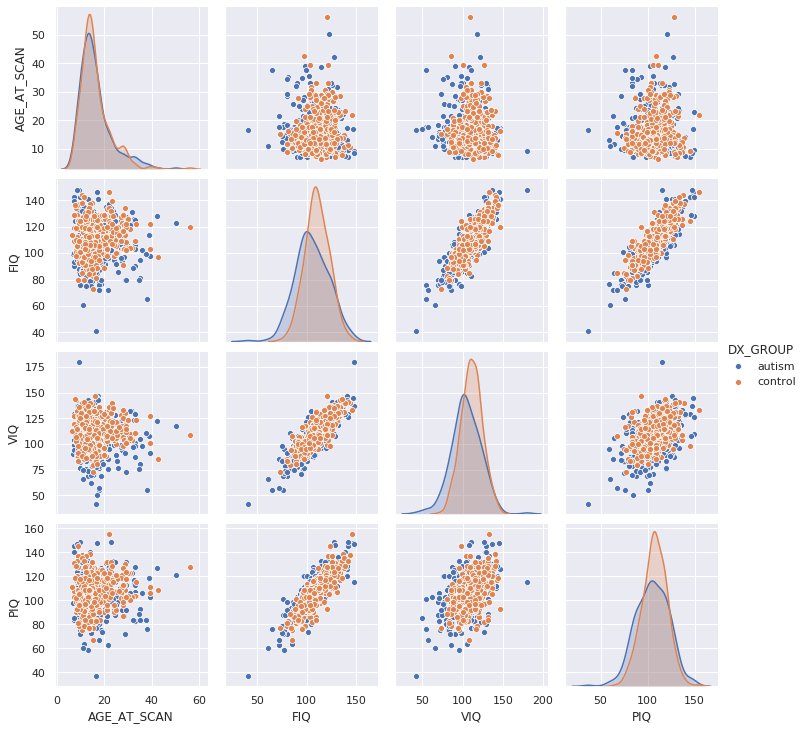

In [13]:
#variable associations and distributions
sns.set()
sns.pairplot(phen_miss, hue= "DX_GROUP", dropna=True)

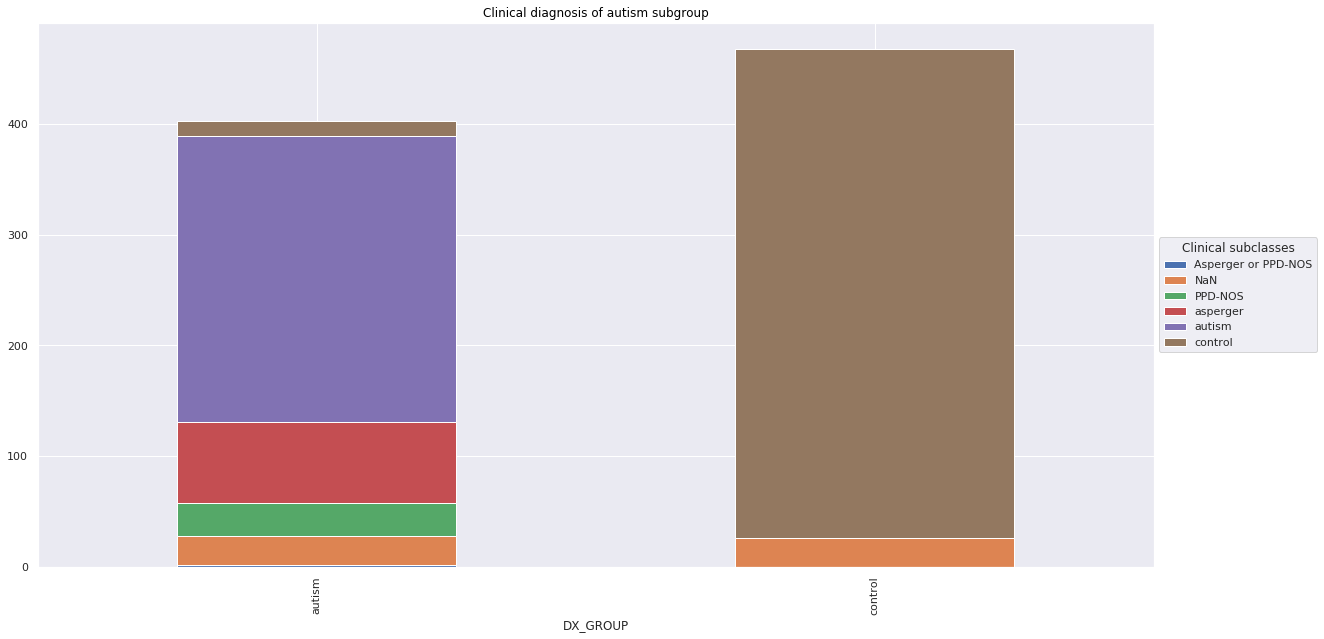

In [12]:
#clinical sub-classes of subjects classified as autistic
sns.set()
pd.crosstab(index=phen['DX_GROUP'],
                columns=phen['DSM_IV_TR']).plot.bar(stacked=True)

plt.title('Clinical diagnosis of autism subgroup', color='black')
plt.legend(title='Clinical subclasses', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.gcf().set_size_inches(20, 10)

/home/anproulx/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



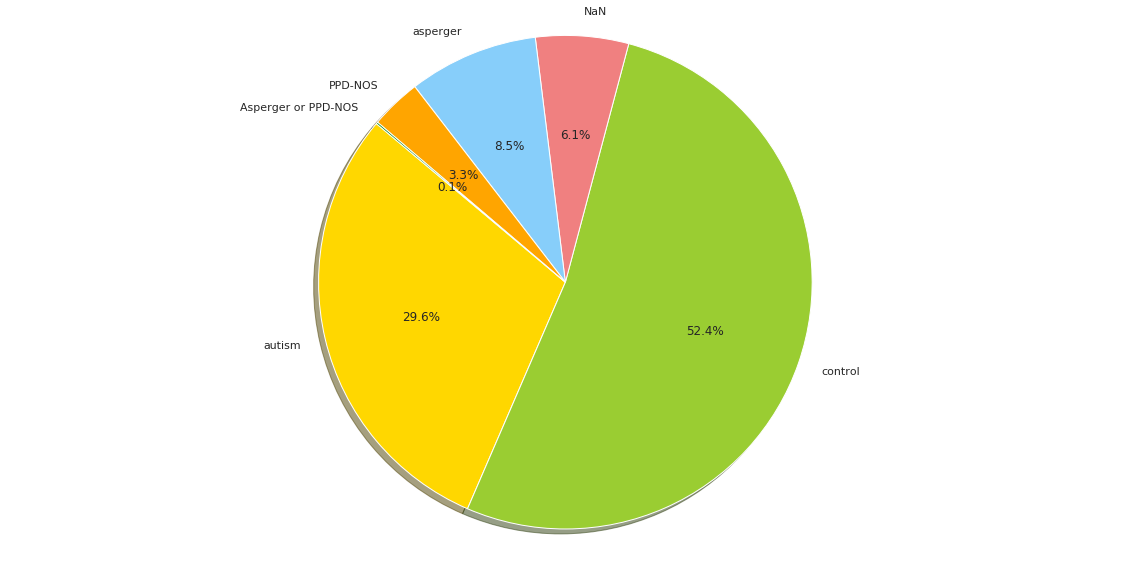

In [8]:
#Labels to use in pie chart
labels = phen["DSM_IV_TR"].drop_duplicates()

#Count frequency for each labels
size=pd.DataFrame(phen["DSM_IV_TR"].groupby(phen["DSM_IV_TR"]).count())
resize= size.reindex(['autism', 'control', 'NaN', 'asperger', 'PPD-NOS', 'Asperger or PPD-NOS'])
#print(resize)

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'green']

# Plot pie chart
plt.pie(resize, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(20, 10)

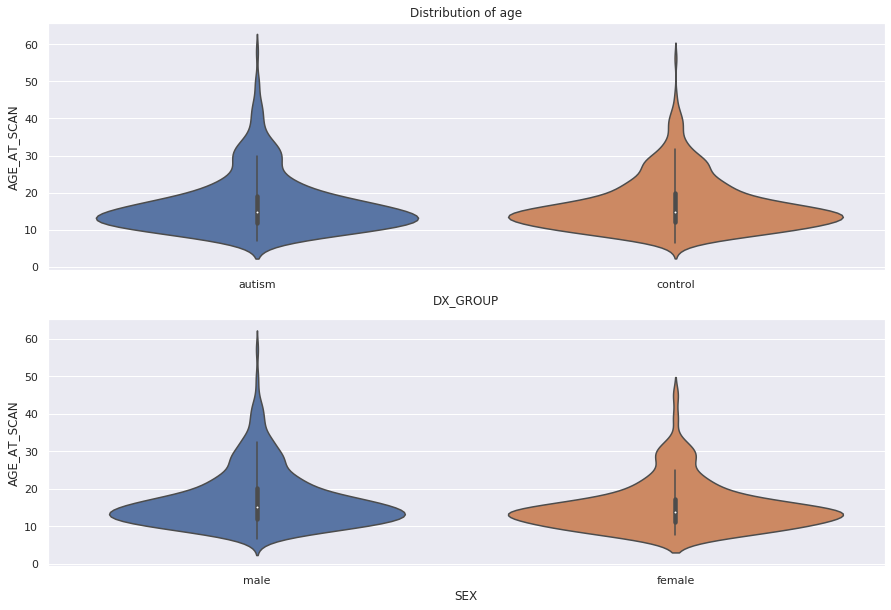

In [9]:
#violinplot

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15 , 10))

ax1 = plt.subplot(2,1,1) 
plt.title("Distribution of age")

sns.violinplot(x='DX_GROUP', 
            y = 'AGE_AT_SCAN',
            data = phen)

ax1 = plt.subplot(2,1,2) 
sns.violinplot(x='SEX', 
            y = 'AGE_AT_SCAN',
            data = phen)

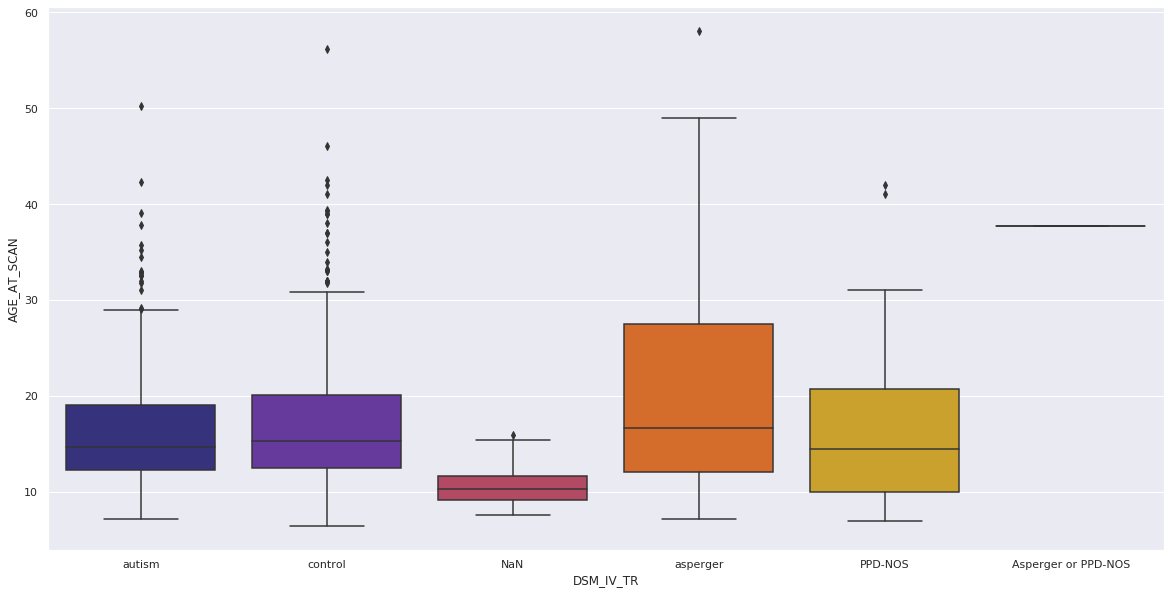

In [123]:
#boxplot
fig, ax = plt.subplots(figsize=(20 , 10))

sns.boxplot(x='DSM_IV_TR', 
            y = 'AGE_AT_SCAN',
            data = phen,
            palette = "CMRmap"
           )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

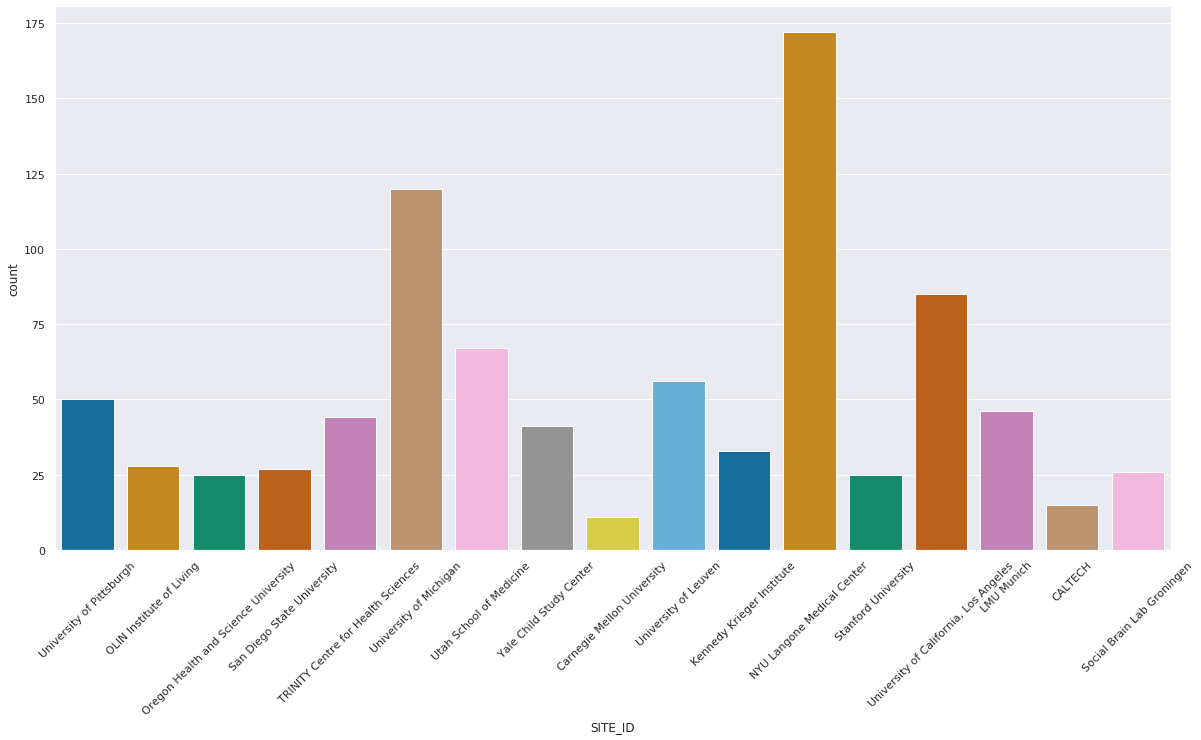

In [18]:
#Histograms : colorblind
fig, ax = plt.subplots(figsize=(20 , 10))
sns.countplot('SITE_ID', data=phen, palette="colorblind")
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

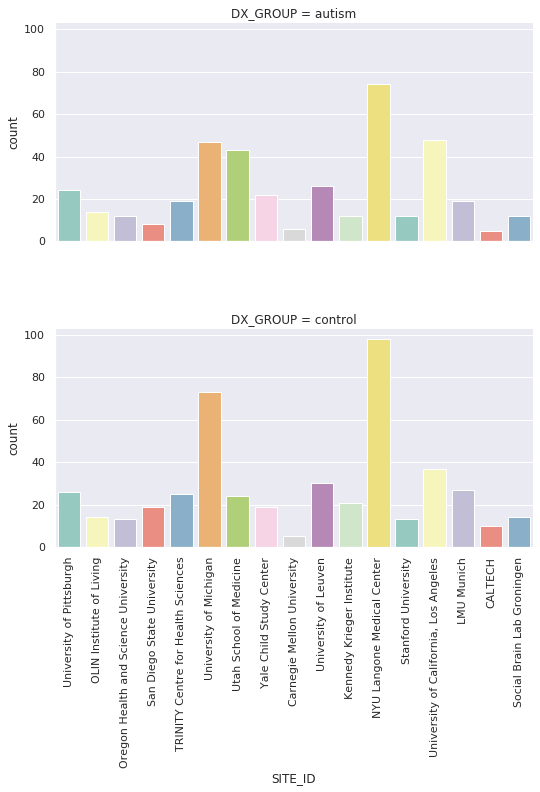

In [16]:
ax= sns.catplot(x="SITE_ID",
                data=phen, row="DX_GROUP", orient="h", height=2, aspect=3, palette="Set3",
                kind="count", dodge=True);

plt.gcf().set_size_inches(10, 10)
plt.xticks(rotation = 90)

# Data exploration using interactive plotting (Plotly)

In [20]:
#basic interactive plot
phen["SEX"].iplot(kind='hist', xTitle='Gender',
                  yTitle='Count', title='Count of f/m')

In [21]:
phen['DSM_IV_TR'].iplot(kind='hist', xTitle='Clinical condition',
                  yTitle='count', title='Clinical distribution', colors="blue")

In [22]:
phen.pivot(columns='DSM_IV_TR', values= "AGE_AT_SCAN").iplot(
        kind='box',
        yTitle='AGE_AT_SCAN',
        title='Age distribution in different clinical conditions')

In [23]:
import plotly.express as px


fig = px.scatter(phen_miss, x="AGE_AT_SCAN", y="FIQ", color="SITE_ID", title="Age distribution according to site")

# If you print fig, you'll see that it's just a regular figure with data and layout
# print(fig)
fig.update_traces(
    line=dict(dash="dot", width=4),
    selector=dict(type="scatter", mode="lines"))

fig.show()

In [29]:
fig = px.scatter(phen, x="AGE_AT_SCAN", animation_frame="SITE_ID", animation_group="SUB_ID", color="DSM_IV_TR", hover_name="SUB_ID", facet_col="SEX",
           log_x=False, size_max=45, range_x=[1,60], range_y=[-5,100])
fig.show()

In [30]:
fig = px.box(phen, x="SITE_ID", y="AGE_AT_SCAN", color="SEX", title ="Distribution of age of male and female subjects for different site",  notched=True)
fig.show()

#import plotly.io as pio
#pio.write_html(fig, file='index.html', auto_open=True)

# Visualization of fMRI data (Nilearn)

In [96]:
#fetch atlas for brain parcellation
parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale064

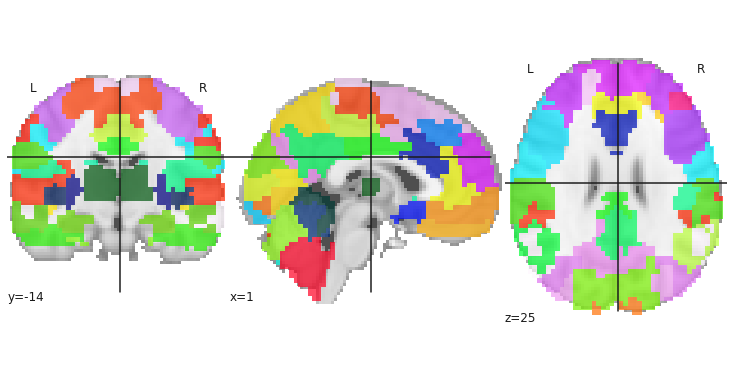

In [97]:
nlp.plot_roi(atlas_filename, draw_cross=True)
plt.gcf().set_size_inches(10, 5)

Preprocessing to create connectome for 1 subject, than will be implemented for all 800.. subjects

In [35]:
fmri_filenames = data.func_preproc[5] #100 subject in the folder
print(fmri_filenames)

/home/anproulx/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050008_func_preproc.nii.gz


In [40]:
im= load_img(fmri_filenames)

multiscale = datasets.fetch_atlas_basc_multiscale_2015()
atlas_filename = multiscale.scale064

# initialize masker (change verbosity)
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, 
                           memory='nilearn_cache', verbose=0)

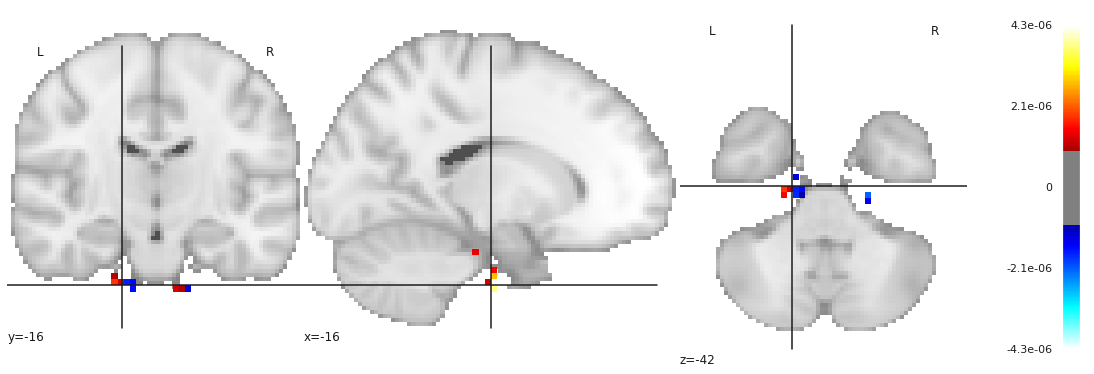

In [42]:
averaged_Img = image.mean_img(fmri_filenames)
nlp.plot_stat_map(averaged_Img)
plt.gcf().set_size_inches(15, 5)

In [ ]:
#Visualization exporation with Nilearn for default mode network (subject 5)

In [45]:
dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)]
labels = [
    'Posterior Cingulate Cortex',
    'Left Temporoparietal junction',
    'Right Temporoparietal junction',
    'Medial prefrontal cortex',
    ]

In [62]:
masker_2 = input_data.NiftiSpheresMasker(
    dmn_coords, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=2)

func_filename = data.func_preproc[5]

time_series = masker_2.fit_transform(func_filename)

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/anproulx/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050008_func_preproc.nii.gz', 
{ 'allow_overlap': False,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'mask_img': None,
  'radius': 8,
  'seeds': [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)],
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': 2}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=2)
[NiftiSpheresMasker.transform_single_imgs] Loading data from /home/anproulx/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050008_func_preproc.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 18.1

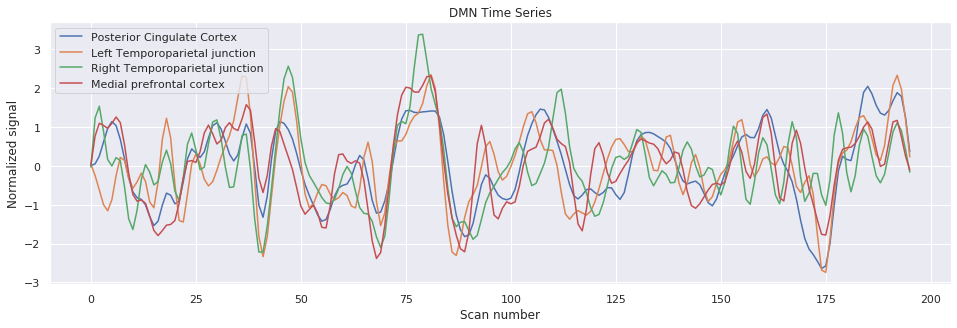

In [63]:
for time_serie, label in zip(time_series.T, labels):
    plt.plot(time_serie, label=label)

plt.title('DMN Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.legend()
plt.tight_layout()
plt.gcf().set_size_inches(15, 5)

In [64]:
connectivity_measure = ConnectivityMeasure(kind='correlation')

partial_correlation_matrix = connectivity_measure.fit_transform(
    [time_series])[0]

partial_correlation_matrix.shape

(4, 4)

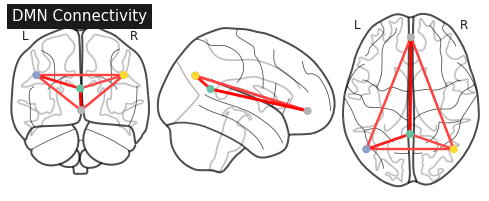

In [66]:
nlp.plot_connectome(partial_correlation_matrix, dmn_coords,
                         title="DMN Connectivity")

In [67]:
view = plotting.view_connectome(partial_correlation_matrix, dmn_coords)
view

In [69]:
time_serie = masker.fit_transform(func_filename)

In [70]:
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_serie])[0]
correlation_matrix.shape

(64, 64)

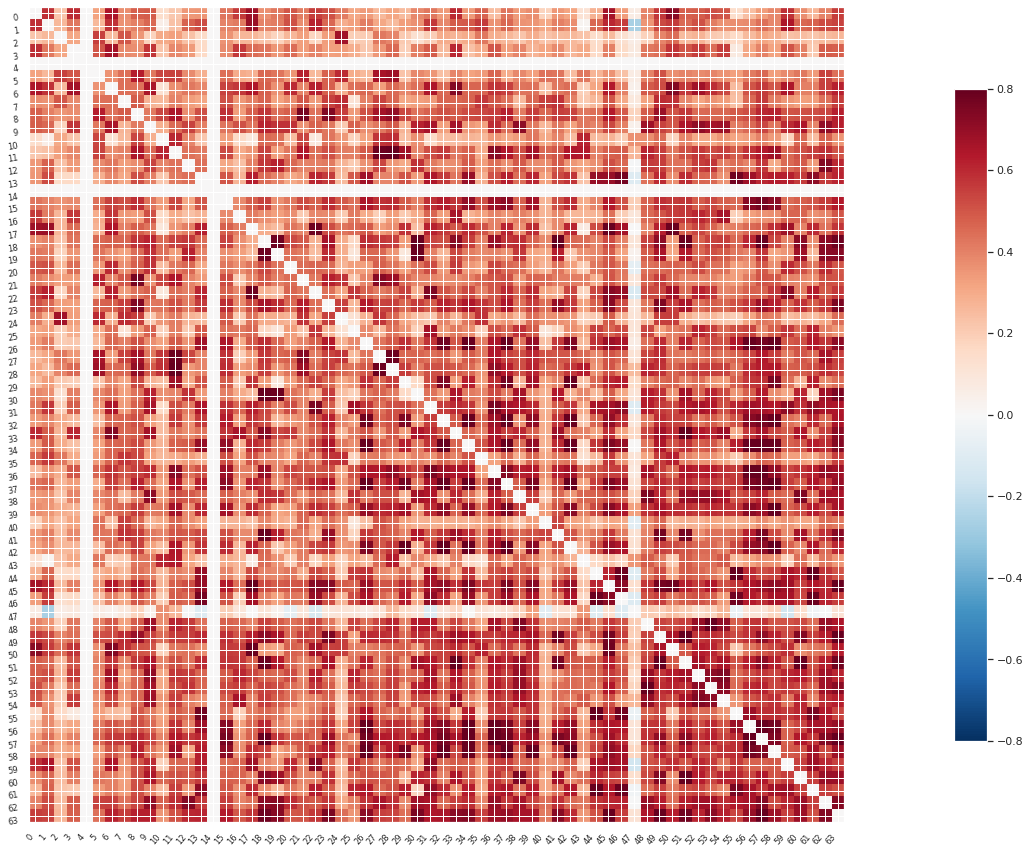

In [78]:
#plot 
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, figure=(25, 15),   
                     labels=range(time_serie.shape[-1]),
                     vmax=0.8, vmin=-0.8, reorder=False) #reorder= True does clustering within the matrix

#remove grid

Extract features for ALL subjects: implement loop over funct_preproc files

In [98]:
feat_file = 'MAIN_BASC064_subsamp_connectomes_half_1d.npz'

X_features = np.load(feat_file)['a']
X_features.shape

#Since the matrix is symmetric, we only need to keep one half of the connectome!

(871, 2080)

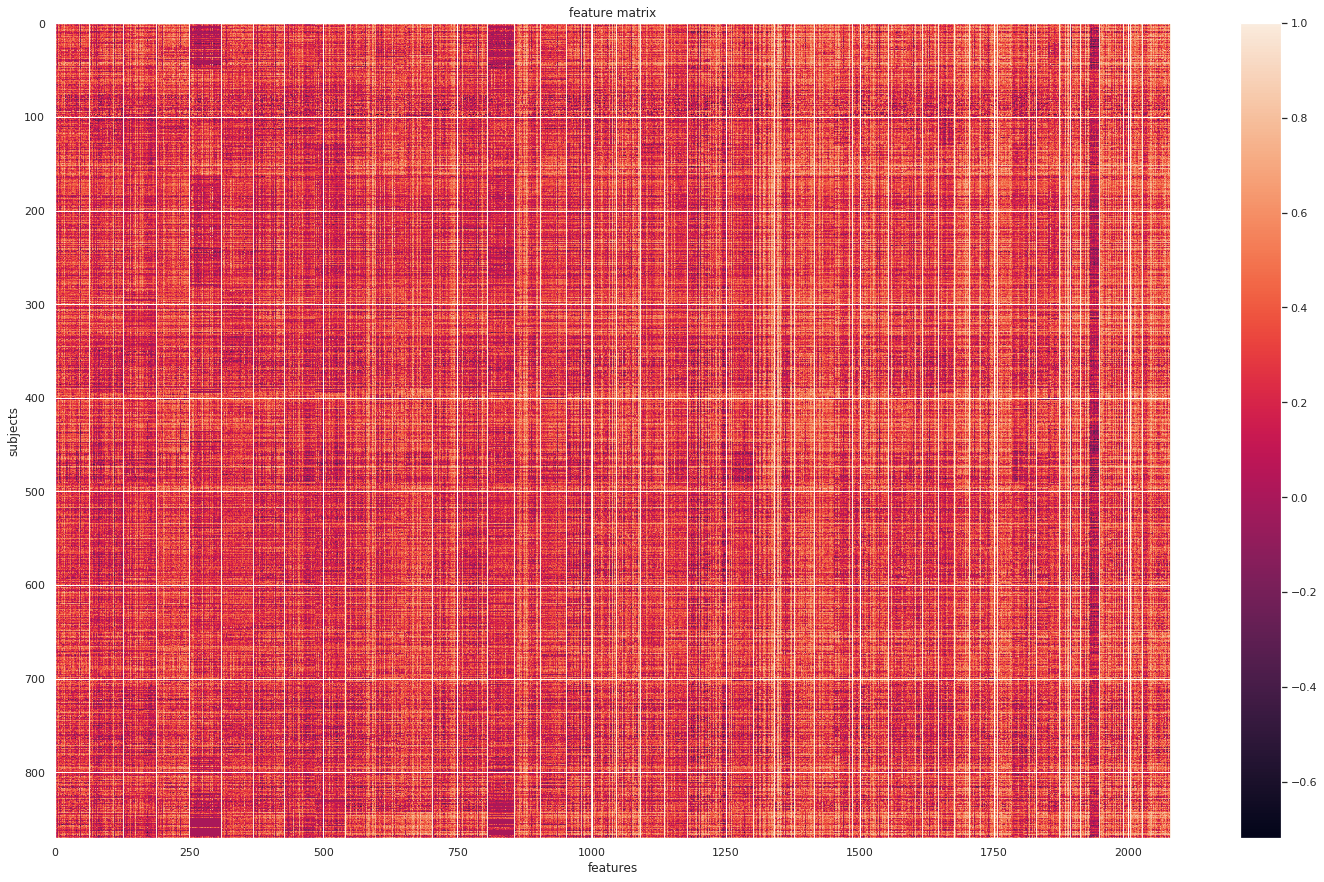

In [130]:
#plot feature matrix

plt.imshow(X_features, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')

plt.gcf().set_size_inches(25, 15)

In [109]:
y=phen['DX_GROUP']

# Dimensionality reduction with PCA

PCA is fundamentally a
dimensionality reduction algorithm, but it can also be useful as a tool for visualization,
for noise filtering, for feature extraction and engineering, and much more. Using PCA for dimensionality reduction involves zeroing out one or more of the
smallest principal components, resulting in a lower-dimensional projection of the
data that preserves the maximal data variance.

In [101]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_features)
#Around 800 components explains close 1,0 of the variance. Important reduction of features (4096 features initially) !!!

In [102]:
#make df with components and cumulative explained variance ratio
df_plotly=pd.DataFrame()
df_plotly["cumulative_variance_ratio_explained"]=np.cumsum(pca.explained_variance_ratio_)

fig = px.line(df_plotly, y="cumulative_variance_ratio_explained",
        line_shape="spline", render_mode="svg", title="Cumulative variance ratio explained represented as a function of n components")
fig.show()

In [103]:
from sklearn.decomposition import PCA
pca = PCA(0.99) #choose n components for 99% variance explained
pca.fit(X_features)
X_features_pca = pca.transform(X_features)


print("original shape: ", X_features.shape)
print("transformed shape:", X_features_pca.shape)

#print(pca.components_)

original shape:  (871, 2080)
transformed shape: (871, 571)


In [88]:
#ls_components = pca.components_
#shape_components = ls_components.shape
#nr_components = shape_components[0]

explained_variance = pca.explained_variance_ratio_

#print(ls_components)

In [89]:
dic_comps = {'PC{}'.format(i): explained_variance[i] for i in range(len(explained_variance))}
df_comps = pd.DataFrame(dic_comps.values(), index = dic_comps.keys(), columns=['explained_variance'])

df_comps.head()

explained_variance
PC0            0.349732
PC1            0.045420
PC2            0.027524
PC3            0.026403
PC4            0.021305

X is now X_features_pca

# Deliverable week 3: interactive validation curve for Support Vector Machines (SVM)

# Gamma 

In [111]:
#Validation curve for different gamma values

param_range_gamma = np.logspace(-6, 2 ,40)

train_scores, test_scores = validation_curve(
    SVC(), X_features_pca, y, param_name="gamma", param_range=param_range_gamma,
    scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [125]:
d_gamma = {'gamma': param_range_gamma, 'train_scores': train_scores_mean, 'test_scores': test_scores_mean, 
     'train_sd': train_scores_std, 'test_sd': test_scores_std, 'train_mean': train_scores_mean, 'test_mean': test_scores_mean , 
     'upper_train': train_scores_mean + train_scores_std , 'upper_test': test_scores_mean + test_scores_std , 'lower_train': train_scores_mean - train_scores_std , 'lower_test':test_scores_mean - test_scores_std }

df_gamma= pd.DataFrame(data=d_gamma)

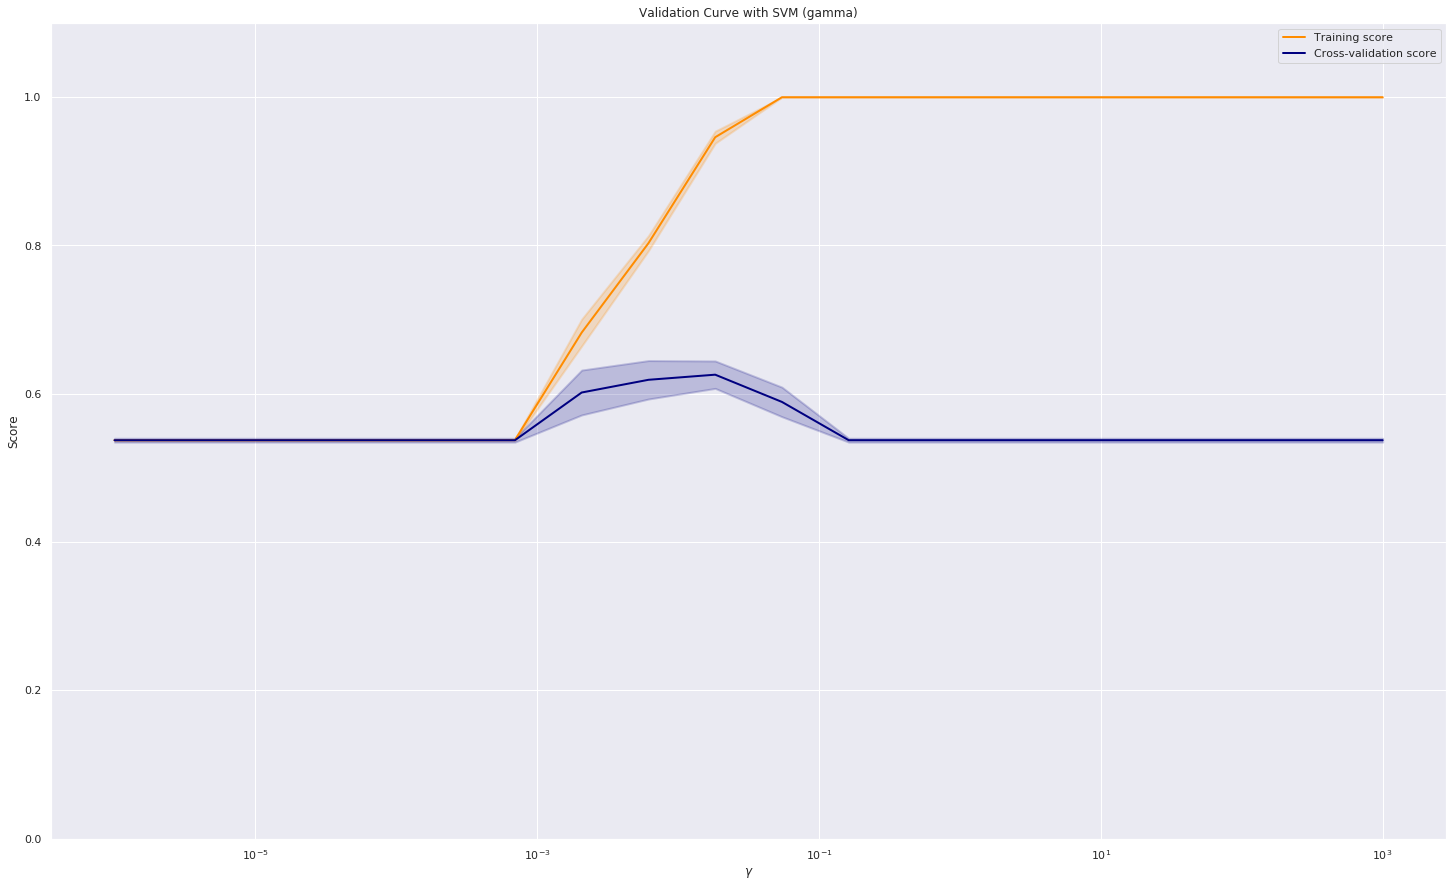

In [227]:
# Plot validation curve with matplotlob

plt.title("Validation Curve with SVM (gamma)")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)

plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.legend(loc="best")
plt.gcf().set_size_inches(25, 15)


# C hyperparameter

In [113]:
#let's plot a validation curve, this time for the "c" hyperparameter

param_range_C = np.logspace(-4 , 2 , 40)

train_scores, test_scores = validation_curve(
    SVC(), X_features_pca, y, param_name="C", param_range=param_range_C,
    scoring="accuracy", n_jobs=1)

train_scores_mean_C = np.mean(train_scores, axis=1)
train_scores_std_C = np.std(train_scores, axis=1)
test_scores_mean_C = np.mean(test_scores, axis=1)
test_scores_std_C = np.std(test_scores, axis=1)

In [121]:
d = {'C': param_range_C, 'train_scores': train_scores_mean_C, 'test_scores': test_scores_mean_C, 
     'train_sd': train_scores_std_C, 'test_sd': test_scores_std_C, 'train_mean': train_scores_mean_C, 'test_mean': test_scores_mean_C , 
     'upper_train': train_scores_mean_C + train_scores_std_C , 'upper_test': test_scores_mean_C + test_scores_std_C , 'lower_train': train_scores_mean_C - train_scores_std_C , 'lower_test':test_scores_mean_C - test_scores_std_C }

df_C= pd.DataFrame(data=d)

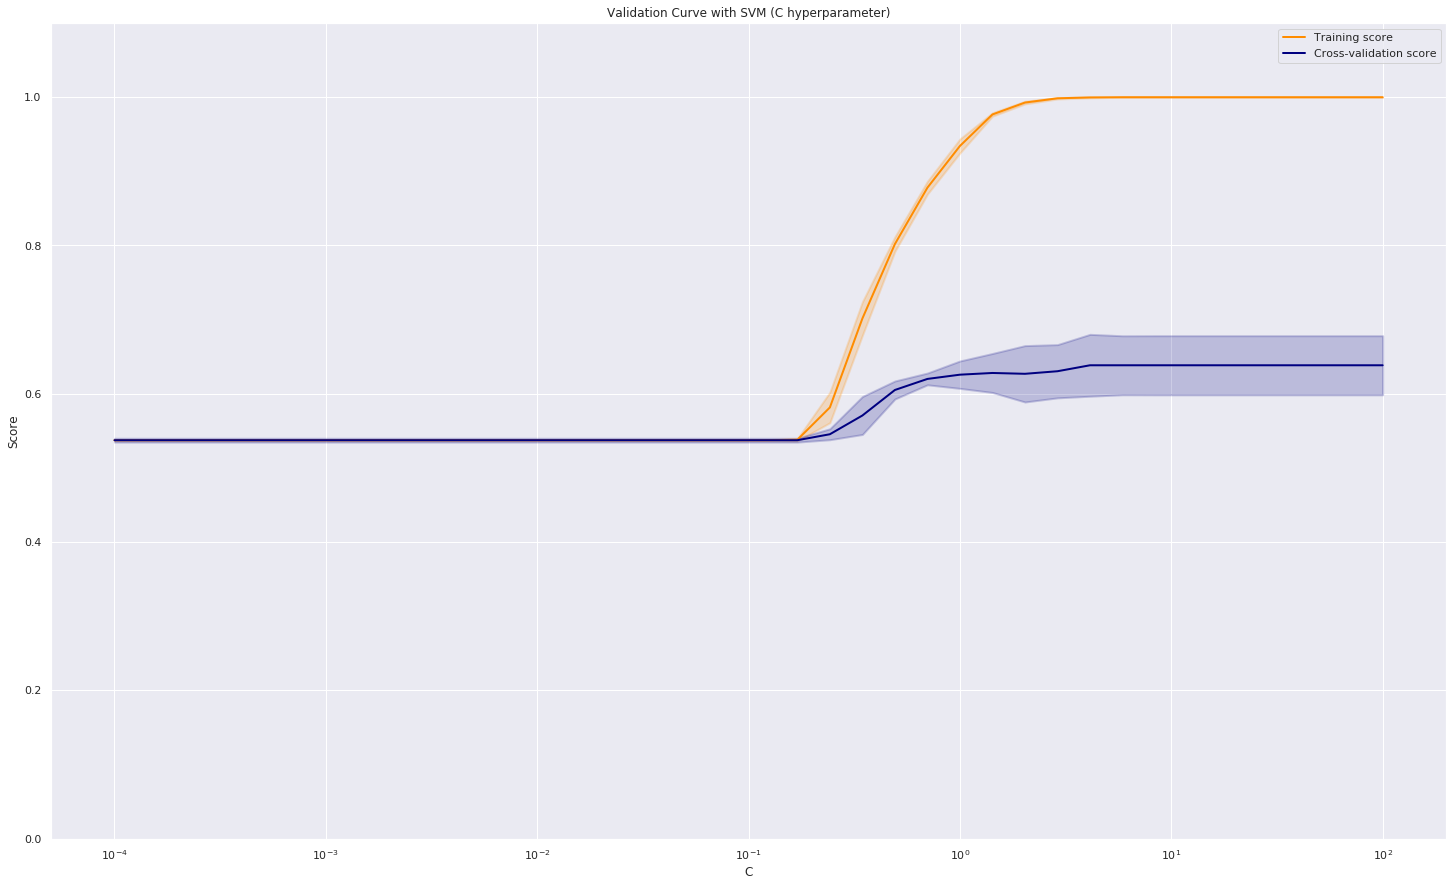

In [126]:
#Validation curve using matplotlib

plt.title("Validation Curve with SVM (C hyperparameter)")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range_C, train_scores_mean_C, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range_C, train_scores_mean_C - train_scores_std_C,
                 train_scores_mean_C + train_scores_std_C, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range_C, test_scores_mean_C, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range_C, test_scores_mean_C - test_scores_std_C,
                 test_scores_mean_C + test_scores_std_C, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.gcf().set_size_inches(25, 15)

Deliverable of week 3

In [116]:
from plotly.subplots import make_subplots

title = 'Validation curve'
labels = ['train_scores', 'test_scores']
labels_name= ['train score', 'cross-validation score']
mean= ['train_mean', 'test_mean']
std=['train_sd', 'test_sd']

colors = ['rgb(0,100,80)', 'rgb(300,100,115)']
colors_fill = ['rgb(0,100,80)', 'rgb(300,100,115)']

line_size = [2, 2]


fig = make_subplots(rows=2, cols=1)

# row 1, col 2 : C

for i in range(0, 2):
    
    fig.add_trace(go.Scatter(x=df_C["C"], y=df_C[labels[i]], mode='lines',
        name=labels_name[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True, ), row=2, col=1)
    
    fig.add_trace(go.Scatter(x=df_C["C"], y=df_C[mean[i]]+df_C[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='upper bound', showlegend=False), row=2, col=1)
    
    fig.add_trace(go.Scatter(x=df_C["C"], y=df_C[mean[i]]-df_C[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='lower bound', showlegend=False), row=2, col=1)
    

for i in range(0, 2):
    
    fig.add_trace(go.Scatter(x=df_gamma["gamma"], y=df_gamma[labels[i]], mode='lines',
        name=labels_name[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True, showlegend=False), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=df_gamma["gamma"], y=df_gamma[mean[i]]+df_gamma[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='upper bound', showlegend=False), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=df_gamma["gamma"], y=df_gamma[mean[i]]-df_gamma[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='lower bound', showlegend=False), row=1, col=1)


fig.update_yaxes(title_text="Accuracy score (%)", row=1, col=1)
fig.update_yaxes(title_text="Accuracy score (%)", row=2, col=1)

fig.update_xaxes(title_text="Gamma (y)", type="log", row=1, col=1)
fig.update_xaxes(title_text="C", type="log", row=2, col=1)

fig.update_layout(title_text="Validation curve for different hyperparameters values : SVM estimator", showlegend=True)

fig.show()

print("understanding the impact of hyperparameter value in regard to one parameter at a time")


import plotly.io as pio

pio.write_html(fig, file='figure.html', auto_open=True)


understanding the impact of hyperparameter value in regard to one parameter at a time
